# 📝 Exercise M2.01

The aim of this exercise is to make the following experiments:

* train and test a support vector machine classifier through cross-validation;
* study the effect of the parameter gamma of this classifier using a
  validation curve;
* use a learning curve to determine the usefulness of adding new samples in
  the dataset when building a classifier.

To make these experiments we first load the blood transfusion dataset.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

In [1]:
import pandas as pd

blood_transfusion = pd.read_csv("../data/blood_transfusion.csv")
data = blood_transfusion.drop(columns="Class")
target = blood_transfusion["Class"]

Here we use a support vector machine classifier (SVM). In its most simple
form, a SVM classifier is a linear classifier behaving similarly to a logistic
regression. Indeed, the optimization used to find the optimal weights of the
linear model are different but we don't need to know these details for the
exercise.

Also, this classifier can become more flexible/expressive by using a so-called
kernel that makes the model become non-linear. Again, no understanding regarding
the mathematics is required to accomplish this exercise.

We will use an RBF kernel where a parameter `gamma` allows to tune the
flexibility of the model.

First let's create a predictive pipeline made of:

* a [`sklearn.preprocessing.StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
  with default parameter;
* a [`sklearn.svm.SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
  where the parameter `kernel` could be set to `"rbf"`. Note that this is the
  default.

In [2]:
# Write your code here.
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

model = make_pipeline(StandardScaler(), SVC())

Evaluate the generalization performance of your model by cross-validation with
a `ShuffleSplit` scheme. Thus, you can use
[`sklearn.model_selection.cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)
and pass a
[`sklearn.model_selection.ShuffleSplit`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html)
to the `cv` parameter. Only fix the `random_state=0` in the `ShuffleSplit` and
let the other parameters to the default.

In [ ]:
# Write your code here.
from sklearn.model_selection import cross_validate, ShuffleSplit
cv = ShuffleSplit(random_state=0)
cv_results = cross_validate(model, data, target, cv=cv, n_jobs=2)
cv_results = pd.DataFrame(cv_results)
cv_results

,fit_time,score_time,test_score
0,0.008719,0.001539,0.680000
1,0.008467,0.001661,0.746667
2,0.006239,0.001442,0.786667
3,0.005809,0.001497,0.800000
4,0.006012,0.001348,0.746667
5,0.005741,0.001427,0.786667
6,0.005491,0.001350,0.800000
7,0.005208,0.001355,0.826667
8,0.005308,0.001406,0.746667
9,0.005397,0.001518,0.733333


As previously mentioned, the parameter `gamma` is one of the parameters
controlling under/over-fitting in support vector machine with an RBF kernel.

Evaluate the effect of the parameter `gamma` by using
[`sklearn.model_selection.ValidationCurveDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ValidationCurveDisplay.html).
You can leave the default `scoring=None` which is equivalent to
`scoring="accuracy"` for classification problems. You can vary `gamma` between
`10e-3` and `10e2` by generating samples on a logarithmic scale with the help
of `np.logspace(-3, 2, num=30)`.

Since we are manipulating a `Pipeline` the parameter name is `svc__gamma`
instead of only `gamma`. You can retrieve the parameter name using
`model.get_params().keys()`. We will go more into detail regarding accessing
and setting hyperparameter in the next section.

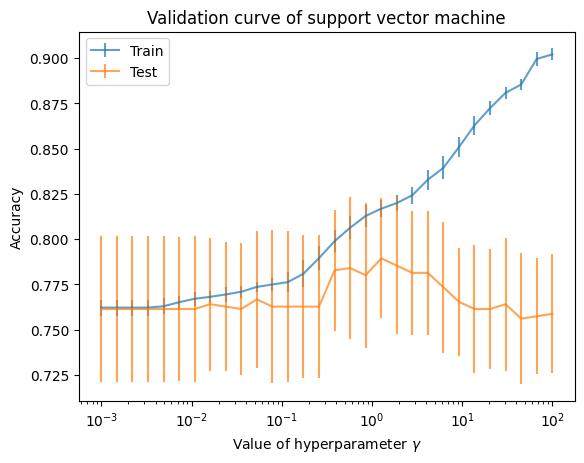

In [6]:
# Write your code here.
import numpy as np
from sklearn.model_selection import ValidationCurveDisplay
gammas = np.logspace(-3, 2, num=30)
param_name = "svc__gamma"
disp = ValidationCurveDisplay.from_estimator(
    model,
    data,
    target,
    param_name=param_name,
    param_range=gammas,
    cv=cv,
    scoring="accuracy", 
    score_name="Accuracy",
    std_display_style="errorbar",
    errorbar_kw={"alpha": 0.7},  
    n_jobs=2,
)

x = disp.ax_.set(
    xlabel=r"Value of hyperparameter $\gamma$",
    title="Validation curve of support vector machine",
)

Now, you can perform an analysis to check whether adding new samples to the
dataset could help our model to better generalize. Compute the learning curve
(using
[`sklearn.model_selection.LearningCurveDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LearningCurveDisplay.html))
by computing the train and test scores for different training dataset size.
Plot the train and test scores with respect to the number of samples.

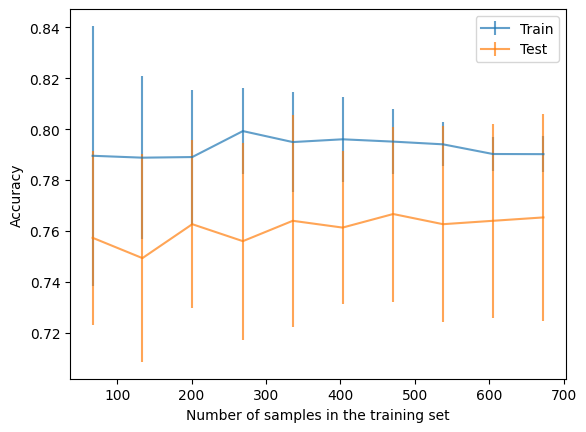

In [7]:
# Write your code here.

from sklearn.model_selection import LearningCurveDisplay

train_sizes = np.linspace(0.1, 1, num=10)
LearningCurveDisplay.from_estimator(
    model,
    data,
    target,
    train_sizes=train_sizes,
    cv=cv,
    score_type="both",
    scoring="accuracy",  
    score_name="Accuracy",
    std_display_style="errorbar",
    errorbar_kw={"alpha": 0.7},  
    n_jobs=2,
)

x = disp.ax_.set(title="Learning curve for support vector machine")